Perusahaan peminjaman sepeda di San Fransisco memintamu untuk menganalisa durasi perjalanan customer mereka. Untuk memudahkan analisa, lakukan hal-hal berikut ini:

## **STATISTIK DESKRIPTIF**

1. Lakukan perhitungan central tendency (mean, median, dan modus).
2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range).
3. Lakukan pengecekan skewness dan kurtosis.
3. Analisa apakah ada data outlier berdasarkan sebaran datanya.
4. Cari tahu berapa persentase outlier terhadap data keseluruhan.
5. Bagaimana perubahan pemusatan data sebelum dan sesudah penghapusan outlier?

## **API**

Buatlah API untuk:
- `Menampilkan` seluruh entry data setelah dilakukan handling outlier.
- `Menghapus` entry data, dari data yang telah dihandling outlier.

clue:
- Load data csv yang sudah diolah dengan pandas, kemudian konversi data ke dictionary `df.to_dict()` atau json `df.to_json()` untuk dapat diolah lebih lanjut dengan API menggunakan FastAPI.
- Pembuatan API dilakukan pada script `.py`
- Endpoint dan penamaan function pada API dibebaskan.


---



Data dapat diakses dari BigQuery dengan ketentuan:

- Project_id: `bigquery-public-data`
- Dataset: `san_francisco_bikeshare`
- Table: `bikeshare_trips`
- Ambil hanya kolom `duration_sec` saja
- Berikan LIMIT pada data yang diambil sebesar 3000 entry data

Koneksikan data di atas menggunakan `BigQuery` ke Google Colab dengan code berikut:
```py
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "rock-wonder-317907" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)
```

Untuk melakukan Query menggunakan cara ini, kamu dapat menggunakan method `client.query('Masukkan Querynya').to_dataframe()`. Outputnya akan berupa Pandas dataframe, sehingga harus import Pandas.

Contoh:

```py
df = client.query('''
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
WHERE created_at < "2022-07-01"
ORDER BY year,month ASC
''').to_dataframe()
```



In [88]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

auth.authenticate_user()
print('Authenticated')

project_id = "proyek-saya-440809" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

'''
put your sql query here, adjust the FROM clause with the following requirements
- project_name: bigquery-public-data
- dataset_name: san_francisco_bikeshare
- table_name: bikeshare_trips
'''

#Pengambilan data dengan limit hanya 3000 data
query = """
SELECT * FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`

LIMIT 3000
"""

df = client.query(query).to_dataframe()

df

Authenticated


,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,201712271027562591,623,2017-12-27 10:27:56+00:00,10th Ave at E 15th St,222,2017-12-27 10:38:20+00:00,10th Ave at E 15th St,222,2591,None,...,None,37.792714,-122.248780,37.792714,-122.248780,1984,Male,None,POINT(-122.2487796 37.7927143),POINT(-122.2487796 37.7927143)
1,201712051457373349,584,2017-12-05 14:57:37+00:00,10th St at Fallon St,201,2017-12-05 15:07:22+00:00,10th Ave at E 15th St,222,3349,None,...,None,37.797673,-122.262997,37.792714,-122.248780,1984,Male,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
2,201710082321501464,763,2017-10-08 23:21:50+00:00,10th St at Fallon St,201,2017-10-08 23:34:33+00:00,10th Ave at E 15th St,222,1464,None,...,None,37.797673,-122.262997,37.792714,-122.248780,<NA>,None,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
3,20180208165758349,560,2018-02-08 16:57:58+00:00,10th St at Fallon St,201,2018-02-08 17:07:19+00:00,10th Ave at E 15th St,222,349,None,...,None,37.797673,-122.262997,37.792714,-122.248780,1984,Male,Yes,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
4,20171215164722144,501,2017-12-15 16:47:22+00:00,10th St at Fallon St,201,2017-12-15 16:55:44+00:00,10th Ave at E 15th St,222,144,None,...,None,37.797673,-122.262997,37.792714,-122.248780,1984,Male,None,POINT(-122.2629973 37.7976728),POINT(-122.2487796 37.7927143)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,20180428143250746,957,2018-04-28 14:32:50+00:00,Mission Dolores Park,120,2018-04-28 14:48:47+00:00,17th St at Valencia St,109,746,None,...,None,37.761420,-122.426435,37.763316,-122.421904,<NA>,None,No,POINT(-122.4264353 37.7614205),POINT(-122.4219039 37.7633158)
2996,201801241840423715,151,2018-01-24 18:40:42+00:00,Mission Playground,121,2018-01-24 18:43:14+00:00,17th St at Valencia St,109,3715,None,...,None,37.759210,-122.421339,37.763316,-122.421904,1979,Male,No,POINT(-122.4213392 37.7592103),POINT(-122.4219039 37.7633158)
2997,201710260107282706,350,2017-10-26 01:07:28+00:00,Mission Playground,121,2017-10-26 01:13:19+00:00,17th St at Valencia St,109,2706,None,...,None,37.759210,-122.421339,37.763316,-122.421904,1982,Male,None,POINT(-122.4213392 37.7592103),POINT(-122.4219039 37.7633158)
2998,201801111957591750,131,2018-01-11 19:57:59+00:00,Mission Playground,121,2018-01-11 20:00:11+00:00,17th St at Valencia St,109,1750,None,...,None,37.759210,-122.421339,37.763316,-122.421904,1985,Female,No,POINT(-122.4213392 37.7592103),POINT(-122.4219039 37.7633158)


1. Perhitungan central tendency (mean, median, dan modus).

Mean

In [46]:
#Nilai mean menyatakan nilai rata-rata dari kolom yang diminta
durasi_rata_rata = df['duration_sec'].mean()
print('Mean of duration in second:', durasi_rata_rata)

Mean of duration in second: 848.5906666666667


Median

In [47]:
#Nilai median menyatakan nilai tengah dari kolom yang diminta. Pada beberapa kasus, nilai median sama nilainya dengan nilai Q2
median = df['duration_sec'].median()
print('Median of suration in sec: ', median)

Median of suration in sec:  493.0


Modus

In [48]:
#Nilai modus menyatakan nilai yang sering muncul dari kolom yang diminta.
#Index 0 menyatakan nilai yang paling sering muncul pertama, index 1 menyatakan nilai yang paling sering muncul kedua
modus = df['duration_sec'].mode()
print('Modus of duration in sec: ', modus)

Modus of duration in sec:  0    237
1    298
Name: duration_sec, dtype: Int64


2. Pengecekan dispersi (standar deviasi, variance, dan range).

Standar Deviasi

In [49]:
#standar deviasi merupakan akar kuadrat dari variance
standard_deviation = df['duration_sec'].std()
print('Standard deviation in duration sec: ', standard_deviation)

Standard deviation in duration sec:  3055.0551336655344


Variance

In [50]:
#Nilai variance menyatakan seberapa jauh sebuah data menyebar dari rata-ratanya
variance = df['duration_sec'].var()
print('Variance in duration sec : ', variance)

Variance in duration sec :  9333361.869736135


Range

In [51]:
#range adalah nilai yang menunjukan selisih antara nili terbesar dan nilai terkecil
range = df['duration_sec'].max() - df['duration_sec'].min()
print('Range in duration sec: ', range)

Range in duration sec:  77048


3. Pengecekan skewness dan kurtosis

Pengecekan skewness

In [52]:
#pengecekan skewness berguna untuk mengecek apakah suatu data simetris atau tidak
skewness = df['duration_sec'].skew()
print('Skewness of duration in sec: ', skewness)

Skewness of duration in sec:  16.625943531095256


Dari nilai skewness didapat di atas, bisa disimpulkan bahwa data tersebut termasuk ke dalam kategori highly skewed dengan ekor condong ke kanan

Pengecekan kurtosis

In [53]:
#pengecekan kurtosis berguna untuk mengukur bentuk dari ekor persebaran dan kehadiran outliers
print(f"Kurtosis of duration sec: ", {df['duration_sec'].kurtosis()})

Kurtosis of duration sec:  {317.37634049376095}


Dari nilai kurtosis yang didapatkan di atas, bisa disimpulkan bahwa data termasuk ke dalam kelompok **leprokurtic**. Ini mengindikasikan bahwa data memiliki lebih banyak outliers atau nilai ekstrim daripada distribusi normal

4. Analisa keberadaan data outlier berdasarkan sebaran datanya

Data outliers adalah data yang keberadaannya jauh dari data yang sedang dianalisis. Dalam mendeteksi keberadaan outliers, bisa digunakan dua metode: Metode Z-Score dan metode Tukey's rule. Karena data yang sedang kita observasi bersifat skewed, maka metode yang digunakan adalah Tukey's rule. Tapi untuk keperluan pembelajaran, metode Z-score tetap akan dihitung

Metode Tukey's rule

In [64]:
Q1 = df['duration_sec'].quantile(0.25)
Q2 = df['duration_sec'].quantile(0.5)
Q3 = df['duration_sec'].quantile(0.75)

IQR = Q3 - Q1

upper_boundary = Q3 + 1.5*IQR
lower_boundary = Q1 - 1.5*IQR

print('Upper boundary: ', upper_boundary)
print('Lower boundary: ', lower_boundary)

Upper boundary:  1474.125
Lower boundary:  -394.875


Ilustrasi persebaran quartil

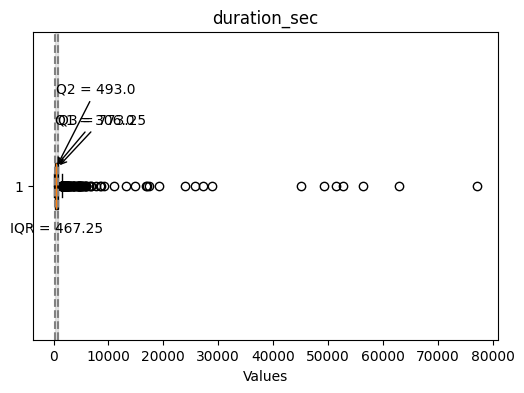

In [67]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['duration_sec'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {Q1}', xy=(Q1, 1.06), xytext=(Q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {Q2}', xy=(Q2, 1.06), xytext=(Q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {Q3}', xy=(Q3, 1.06), xytext=(Q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {IQR}', xy=((Q1+Q3)/2, 0.85), ha='center')

plt.axvline(Q1, linestyle='--', color='gray', label='Q1')
plt.axvline(Q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(Q1, Q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('duration_sec')

plt.show()

Metode Z Score

In [62]:
Up_boundary = durasi_rata_rata + 3*std
low_boundary = durasi_rata_rata - 3*std

print(f'Up_bound: {Up_boundary:.2f}')
print(f'Low_bound: {low_boundary:.2f}')

Up_bound: 10013.76
Low_bound: -8316.57


5. Persentase outliers terhadap keseluruhan data

Tukey's rule

In [68]:
outliers = df['duration_sec'][(df['duration_sec'] < lower_boundary) | (df['duration_sec'] > upper_boundary)]


print(f'Percentage of outliers: {len(outliers)*100/len(df["duration_sec"]):.2f}%')

Percentage of outliers: 5.87%


Penggambaran outliers dalam bentuk grafik:

<Axes: >

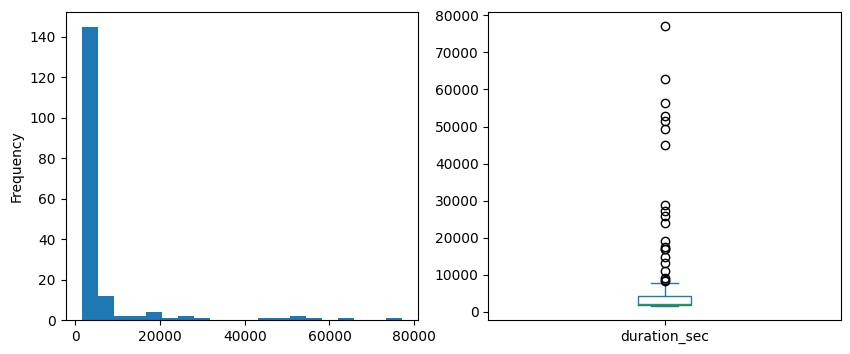

In [58]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

outliers.plot(kind='hist',bins=20,ax=ax[0])
outliers.plot(kind='box',ax=ax[1])

Z-Score

In [79]:
out_liers = df['duration_sec'][(df['duration_sec'] < low_boundary) | (df['duration_sec'] > Up_boundary)]


print(f'Percentage of outliers: {len(out_liers)*100/len(df["duration_sec"]):.2f}%')

Percentage of outliers: 0.60%


Penggambaran outliers dalam bentuk grafik:

<Axes: >

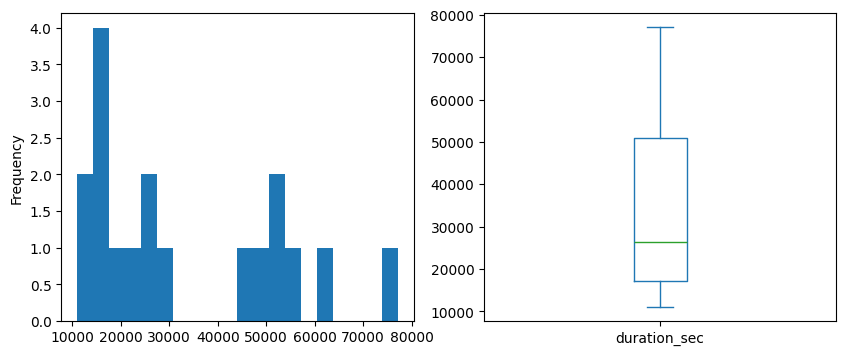

In [83]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

out_liers.plot(kind='hist',bins=20,ax=ax[0])
out_liers.plot(kind='box',ax=ax[1])

6. Penghapusan Outliers

Tukey's rule

In [78]:
no_outliers = df['duration_sec'][(df['duration_sec'] >= lower_boundary) & (df['duration_sec'] <= upper_boundary)]

print(f'Percentage of no_outliers: {len(no_outliers)*100/len(df["duration_sec"]):.2f}%')

Percentage of no_outliers: 94.13%


Penggambaran outliers yang sudah dihapus dalam grafik:

<Axes: >

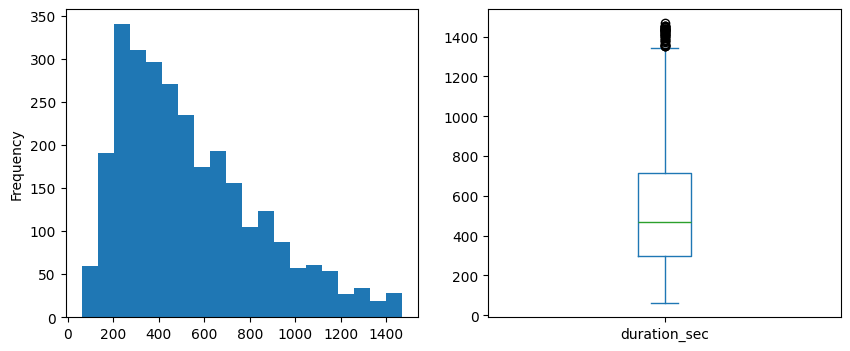

In [77]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outliers.plot(kind='hist',bins=20,ax=ax[0])
no_outliers.plot(kind='box',ax=ax[1])

Outliers masih ada dalam data

Metode Z-Score

In [82]:
no_out_liers = df['duration_sec'][(df['duration_sec'] >= low_boundary) & (df['duration_sec'] <= Up_boundary)]

print(f'Percentage of no_out_liers: {len(no_out_liers)*100/len(df["duration_sec"]):.2f}%')

Percentage of no_out_liers: 99.40%


<Axes: >

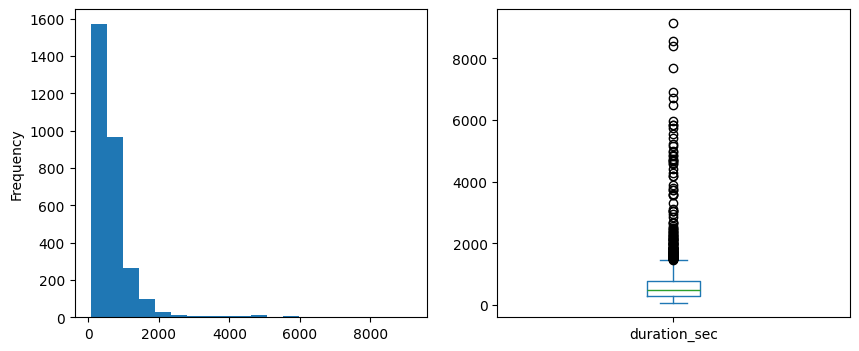

In [81]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_out_liers.plot(kind='hist',bins=20,ax=ax[0])
no_out_liers.plot(kind='box',ax=ax[1])

Kesimpulan:
1. Metode Tukey's rule:
Sebeleum dilakukan penghapusan outliers, pemusatan data tersebar menurut persentase keberadaan outliers. Setelah dilakukan penghapusan outliers, pemusatan data terlihat lebih rapih dengan bagian outliers yang lebih sedikit
2. Metode Z-Score:
Sebelum dilakukan penghapusan outliers, pemusatan data terlihat rapih dengan tidak adanya outliers yang nampak. Sedangkan setelah penghapusan outliers, data justru terlihat lebih menyebar





In [89]:
no_outliers.to_csv("handled_data.csv", index=False)
files.download('handled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>